In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
from cycler import cycler
import seaborn as sns
import warnings

In [3]:
data = pd.read_csv(r'C:\Users\Lenovo\Documents\Ironhack\Project_Week_4\diamonds_clean.csv')
data = data.drop('Unnamed: 0', axis=1)
data = data.drop('Unnamed: 0.1', axis=1)

1. MALPLOLIB

BAR PLOT

Text(0, 0.5, 'count')

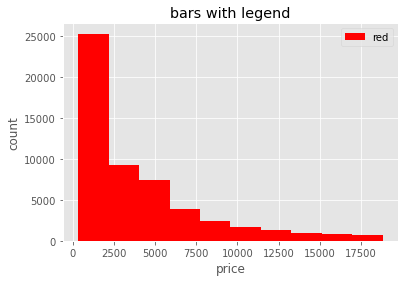

In [157]:
n_bins = 10  #most sold, have low price
colors = ['red']
fig, ax = plt.subplots()
ax.hist(data['price'], n_bins, density=False, histtype='bar', color=colors, label=colors)
ax.legend(prop={'size': 10})
ax.set_title('bars with legend')
plt.xlabel('price')
plt.ylabel('count')



No handles with labels found to put in legend.


Text(0, 0.5, 'count')

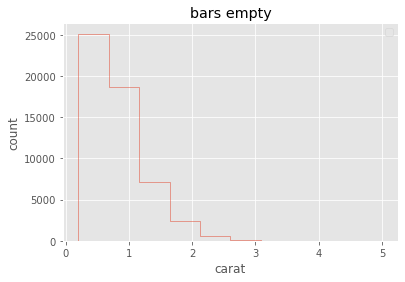

In [13]:
n_bins = 10 #most sold have low carat
colors = ['red']
fig, ax = plt.subplots()
ax.hist(data['carat'], n_bins, histtype='step', stacked=True, fill=False)
ax.legend(prop={'size': 10})
ax.set_title('bars empty')
plt.xlabel('carat')
plt.ylabel('count')


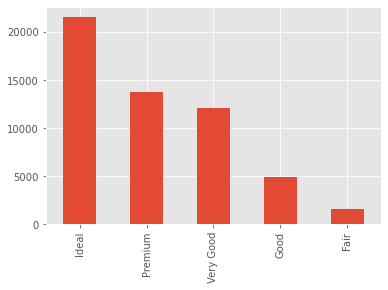

In [9]:
plt.style.use('ggplot') # most sold have a nicer cut ( but they are not the most expensive)
data['cut'].value_counts().plot(kind='bar')
plt.show()

SCATTER

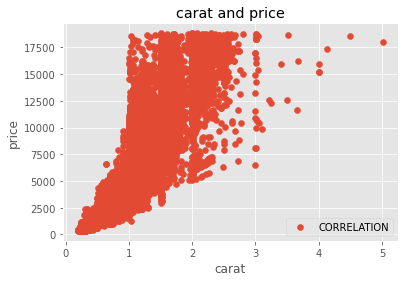

In [160]:
plt.scatter(x=data['carat'], y=data['price'], label='CORRELATION') #more carat is hight, more price are hight

plt.xlabel('carat')
plt.ylabel('price')

plt.title("carat and price")
plt.legend()
plt.show()




<AxesSubplot:xlabel='clarity', ylabel='price'>

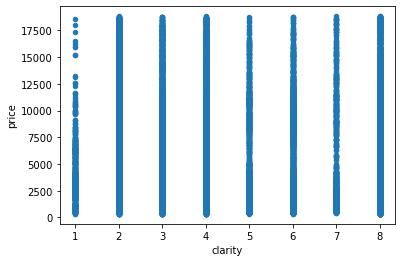

In [6]:
#data.plot(x = 'column1_name', y = 'column2_name', kind = 'scatter')
data.plot(x = 'clarity', y = 'price', kind = 'scatter') #not correlation

PIE PLOT

<AxesSubplot:ylabel='cut'>

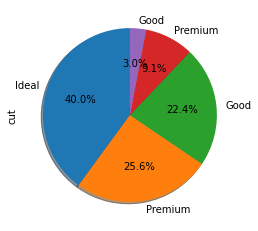

In [4]:
data.cut.value_counts().plot(kind='pie', autopct='%1.1f%%', #format which work with non numeric value
 startangle=90, shadow=True, labels=data['cut'], legend = False, fontsize=10)

STACKED PLOT

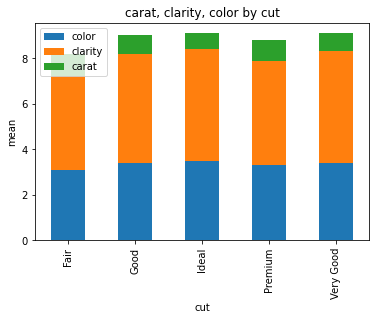

In [5]:
data1=data[['cut','color','clarity', 'carat']].groupby(['cut']).agg("mean")
data1.round(1).plot(kind='bar', stacked=True)

plt.xlabel('cut')
plt.ylabel('mean')

plt.title("carat, clarity, color by cut")
plt.legend()
plt.show()
 #cut doesn't depend on color, clarity and carat

CORRELATION MATRIX

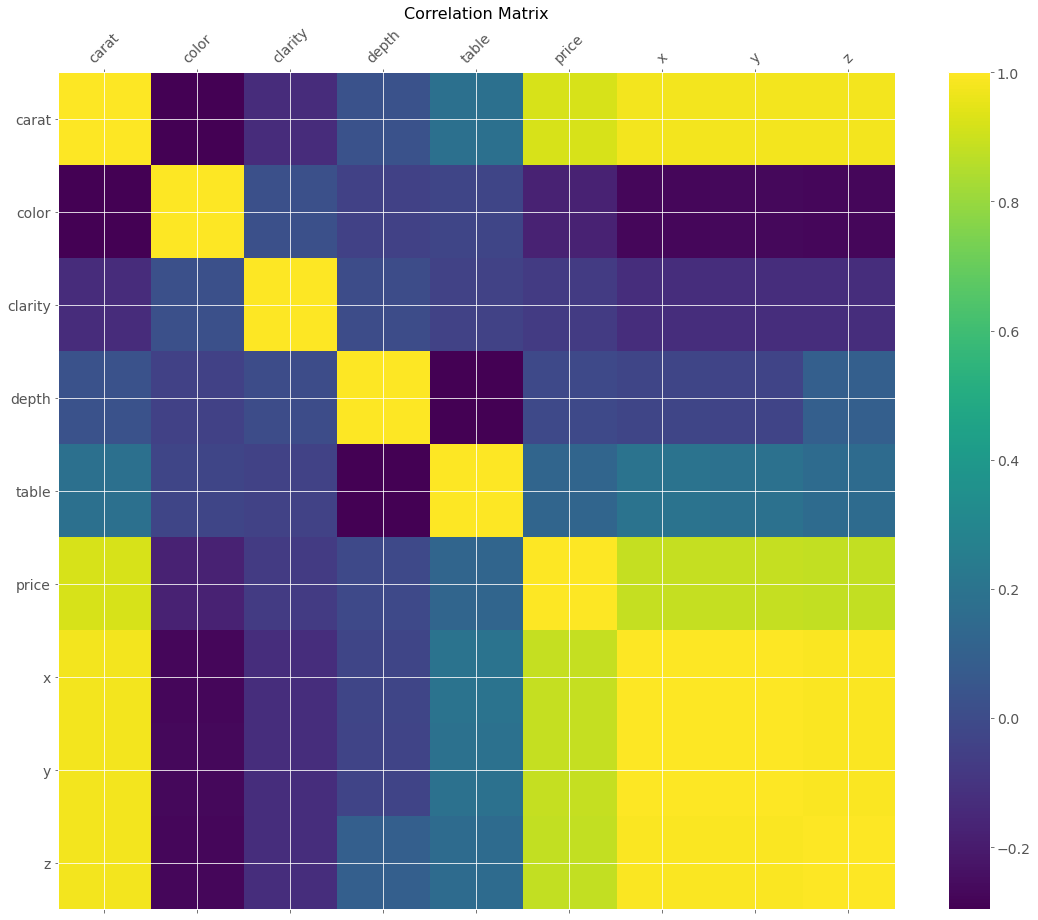

In [165]:
f = plt.figure(figsize=(19, 15))  #price, carat and size (x, y, z) are most correlated
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

3. SEABORN

DISPLOT

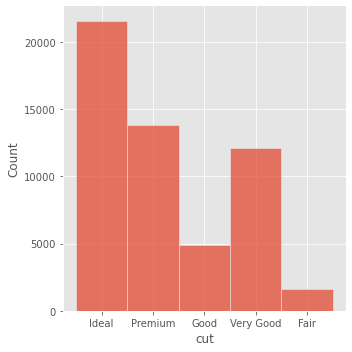

In [171]:
sns.displot(data['cut']) #frequency most sold have ideal cut

RELPLOT

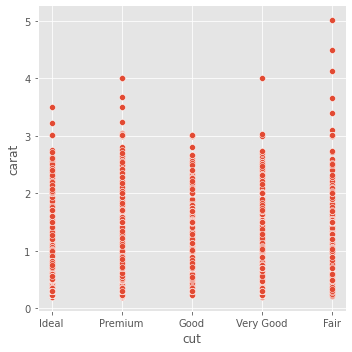

In [172]:
sns.relplot(x="cut", y="carat", data=data) # shows that ideal cut is made on low and medium carat but not on hight carat

LMPLOT

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


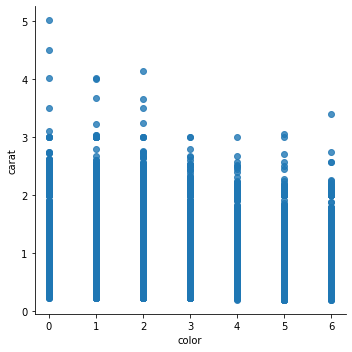

In [8]:
sns.lmplot("color", "carat", data=data, fit_reg=False) #hight carat has low color


BOXPLOT

<AxesSubplot:title={'center':'carat'}, xlabel='cut'>

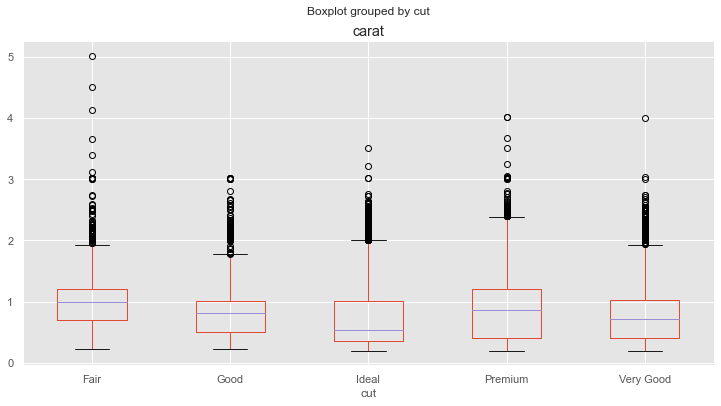

In [147]:
data.boxplot(column="carat",by="cut") # cut is low for hight carat 

<AxesSubplot:title={'center':'carat'}, xlabel='clarity'>

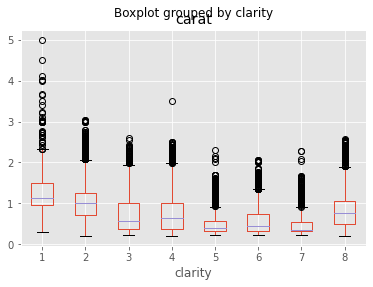

In [14]:
data.boxplot(column="carat",by="clarity") #carat hight but light clarity

VIOLINPLOT

<AxesSubplot:xlabel='price'>

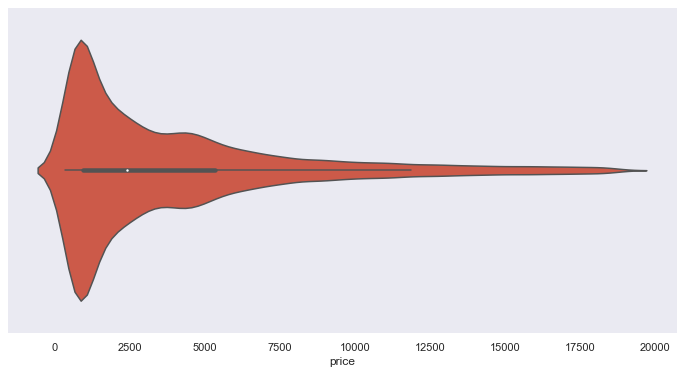

In [153]:
sns.violinplot(x="price", data=data) # most sold have a price between 1000 et 1500

<AxesSubplot:ylabel='carat'>

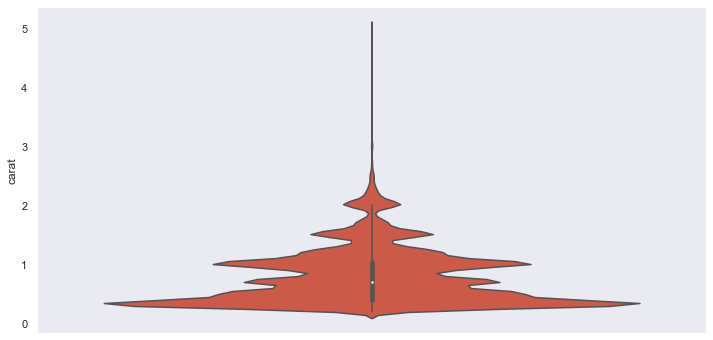

In [154]:
sns.set_style("dark")
mpl.rcParams['figure.figsize'] = (12, 6)
sns.violinplot(y="carat", data=data)  # most frequent diamonds have low quantity carat

LINEPLOT

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cut', ylabel='price'>

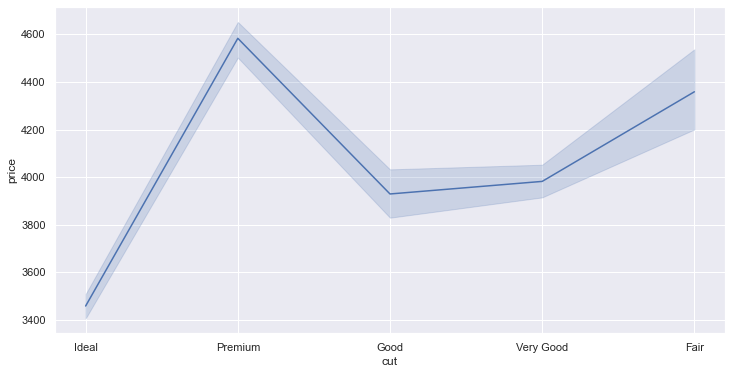

In [156]:
sns.lineplot(data.cut, data.price) # more the cut is low, more there is variation of price

COUNPLOT

Text(0.5, 1.0, 'cut and color')

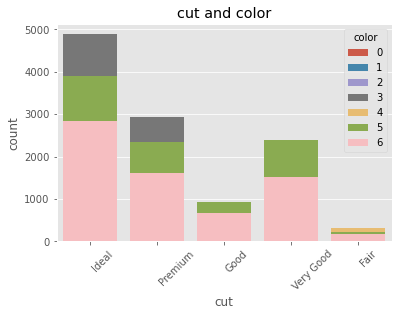

In [10]:
sns.countplot(x = 'cut', hue = 'color', data = data, #to see the color by cut
              dodge = False) 
plt.xticks(rotation = 45, ha = 'left')
plt.legend(title = 'color', bbox_to_anchor = (1, 1))
plt.title('cut and color')

CATPLOT

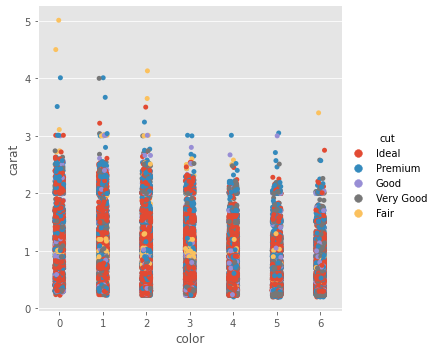

In [11]:
sns.catplot(x="color", y="carat", hue="cut", data=data)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


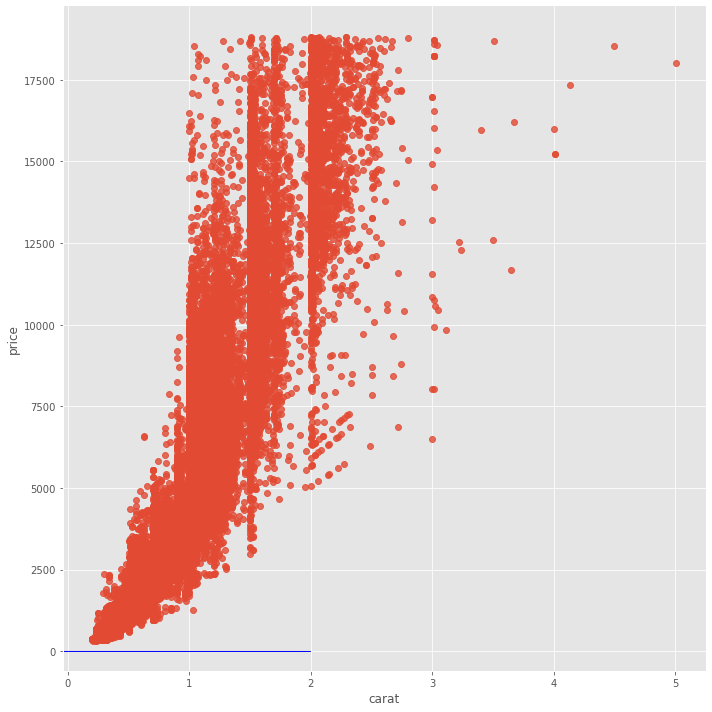

In [12]:
from matplotlib.patches import Ellipse
elps = Ellipse((0, 0), 4, 2,edgecolor='b',facecolor='none')
a = sns.lmplot("carat", "price", data=data,  fit_reg=False, size=10)
ax = a.facet_axis(0,0)
ax.add_artist(elps)
